# YOUR PROJECT TITLE

introduction to the dataproject

## Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, widgets
import dataproject
import csv

# Specifying the filename
filename = "DataProject_Data.csv"

with open('DataProject_Data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)
# autoreload modules when code is run
#%load_ext autoreload
#%autoreload 2
DataProject_Data = pd.read_csv(filename, delimiter=";")

Solowclass = dataproject.Solowclass(filename)

['t;DK_B_t;DK_L_t;DK_K_t ;DK_Q_t ;US_B_t;US_L_t;US_K_t;US_Q_t ;IN_B_t;IN_L_t;IN_K_t ;IN_Q_t ;CN_B_t;CN_L_t;CN_K_t ;CN_Q_t ']
['1960;17203', '33;2111660;2', '66627E+11;75799778713;18524', '19;70956940;1', '46931E+13;3', '51094E+12;1105', '53;179374600;1', '0587E+12;4', '47576E+11;2471', '33;295659330;6', '39094E+11;6', '89786E+11']
['1961;17461', '37995;2123738', '695;2', '83473E+11;78546887065;18802', '05285;71921954', '38;1', '51819E+13;3', '61844E+12;1122', '11295;182836529', '8;1', '17158E+12;4', '78456E+11;2508', '39995;299443769', '4;9', '42305E+11;8', '28053E+11']
['1962;17723', '30065;2135886', '481;3', '00821E+11;81337562942;19084', '08364;72900092', '96;1', '56851E+13;3', '72906E+12;1138', '944644;186365274', '8;1', '29086E+12;5', '10384E+11;2546', '025949;303276649', '7;1', '30017E+12;9', '66072E+11']
['1963;17989', '15016;2148103', '751;3', '18676E+11;84173374003;19370', '3449;73891534', '23;1', '62031E+13;3', '84286E+12;1156', '028814;189962124', '6;1', '41666E+12;5', '4339

Slet mellemrum i data og lav alle variable om til floats i stedet for strings

In [3]:
# Remove trailing whitespaces from column names
DataProject_Data.columns = DataProject_Data.columns.str.strip()

# Convert specific columns to strings before replacing commas
string_columns = ['DK_K_t', 'US_K_t']  # Add other columns if needed
for column in string_columns:
    DataProject_Data[column] = DataProject_Data[column].astype(str)

# Now you can access the columns without trailing whitespaces
DataProject_Data['DK_K_t'] = DataProject_Data['DK_K_t'].str.replace(',', '.')
DataProject_Data['US_K_t'] = DataProject_Data['US_K_t'].str.replace(',', '.')

# Convert strings to floats for specified columns
columns_to_convert = ['DK_B_t', 'US_B_t', 'IN_B_t', 'CN_B_t',
                     'DK_K_t', 'US_K_t', 'IN_K_t', 'CN_K_t',
                     'DK_Q_t', 'US_Q_t', 'IN_Q_t', 'CN_Q_t',
                     'DK_L_t', 'US_L_t', 'IN_L_t', 'CN_L_t']

for column in columns_to_convert:
    DataProject_Data[column] = DataProject_Data[column].str.replace(',', '.').astype(float)


In [4]:
# Check data types
print(DataProject_Data.dtypes)

# Inspect sample data
print(DataProject_Data.head())

# Calculate statistics
print(DataProject_Data.describe())


t           int64
DK_B_t    float64
DK_L_t    float64
DK_K_t    float64
DK_Q_t    float64
US_B_t    float64
US_L_t    float64
US_K_t    float64
US_Q_t    float64
IN_B_t    float64
IN_L_t    float64
IN_K_t    float64
IN_Q_t    float64
CN_B_t    float64
CN_L_t    float64
CN_K_t    float64
CN_Q_t    float64
dtype: object
      t       DK_B_t       DK_L_t        DK_K_t        DK_Q_t       US_B_t  \
0  1960  17203.33000  2111660.000  2.666270e+11  7.579978e+10  18524.19000   
1  1961  17461.37995  2123738.695  2.834730e+11  7.854689e+10  18802.05285   
2  1962  17723.30065  2135886.481  3.008210e+11  8.133756e+10  19084.08364   
3  1963  17989.15016  2148103.751  3.186760e+11  8.417337e+10  19370.34490   
4  1964  18258.98741  2160390.905  3.370440e+11  8.705587e+10  19660.90007   

        US_L_t        US_K_t        US_Q_t       IN_B_t       IN_L_t  \
0  70956940.00  1.469310e+13  3.510940e+12  1105.530000  179374600.0   
1  71921954.38  1.518190e+13  3.618440e+12  1122.112950  182836529.

In [5]:
# Define colors for each country
colors = {'DK': 'blue', 'US': 'green', 'IN': 'red', 'CN': 'purple'}

# Define the function to plot the data for the selected indicator and year range
def plot_indicator(indicator, year_range):
    plt.figure(figsize=(10, 6))
    for country in ['DK', 'US', 'IN', 'CN']:
        plt.plot(DataProject_Data['t'], DataProject_Data[country + '_' + indicator], 
                 label=country, color=colors[country])
    plt.title('Trend of {} indicator for each country over Time'.format(indicator))
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xlim(year_range)  # Set the x-axis limits based on the selected year range
    plt.show()

# Get the list of indicators from the column names of the DataFrame
indicators = ['B_t', 'L_t', 'K_t', 'Q_t']

# Define the year range based on the minimum and maximum years in the data
min_year = DataProject_Data['t'].min()
max_year = DataProject_Data['t'].max()

# Create an interactive dropdown menu to select the indicator and a slider to select the year range
interact(plot_indicator, 
         indicator=indicators, 
         year_range=widgets.IntRangeSlider(min=min_year, max=max_year, step=1, 
                                           value=[min_year, max_year], description='Year Range'))

interactive(children=(Dropdown(description='indicator', options=('B_t', 'L_t', 'K_t', 'Q_t'), value='B_t'), In…

<function __main__.plot_indicator(indicator, year_range)>

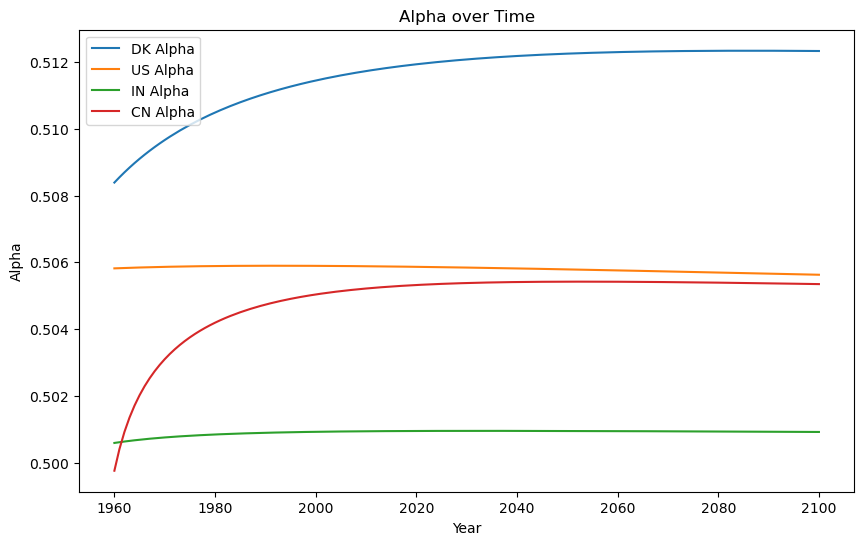

In [6]:
class AlphaCalculator:
    def __init__(self, data):
        self.data = data
        
    def calculate_alpha(self, Q_col, B_col, K_col, L_col):
        ln_Q_t = np.log(self.data[Q_col])
        ln_B_t = np.log(self.data[B_col])
        ln_KL_t = np.log(self.data[K_col] * self.data[L_col])
        
        alpha_value = (ln_Q_t - ln_KL_t) / (ln_B_t - ln_KL_t)
        return alpha_value
    
    def plot_alpha(self, alpha_col, label):
        plt.plot(self.data['t'], self.data[alpha_col], label=label)
        plt.xlabel('Year')
        plt.ylabel('Alpha')
        plt.legend()

# Create an instance of AlphaCalculator
alpha_calculator = AlphaCalculator(DataProject_Data)

# Calculate and plot alpha values for each country
countries = ['DK', 'US', 'IN', 'CN']
plt.figure(figsize=(10, 6))
for country in countries:
    alpha_col_name = f'{country}_alpha'
    alpha_value = alpha_calculator.calculate_alpha(f'{country}_Q_t', f'{country}_B_t', f'{country}_K_t', f'{country}_L_t')
    DataProject_Data[alpha_col_name] = alpha_value
    alpha_calculator.plot_alpha(alpha_col_name, f'{country} Alpha')

# Plot alpha values over time for all countries
plt.title('Alpha over Time')
plt.show()




# Read and clean data

hejehje

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.